In [ ]:
#Importing dataset
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

#Loading Dataset

In [ ]:
data = pd.read_csv("diabetes.csv")
print("Successfully Imported Data!")
data.head()

Successfully Imported Data!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Description

In [ ]:
print(data.shape)

(768, 9)


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Finding Null values

In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Analysis

##Countplot

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#0 means no diabeted
#1 means patient with diabtes

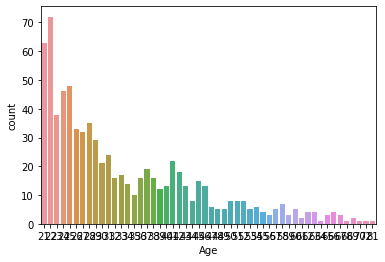

In [ ]:
sns.countplot(data['Age'])
plt.show()

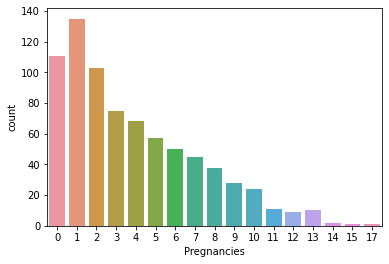

In [ ]:
sns.countplot(data['Pregnancies'])
plt.show()

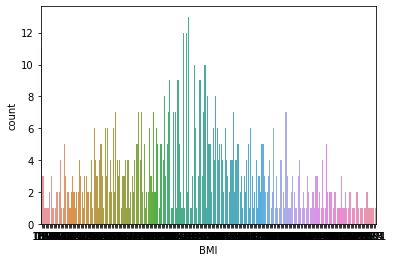

In [ ]:
sns.countplot(data['BMI'])
plt.show()

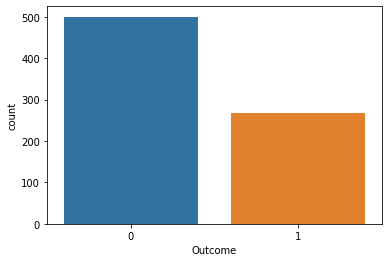

In [ ]:
sns.countplot(data['Outcome'])
plt.show()

#Distplot

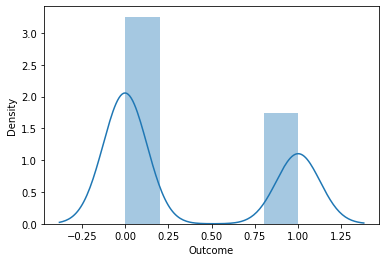

In [ ]:
sns.distplot(data['Outcome'])

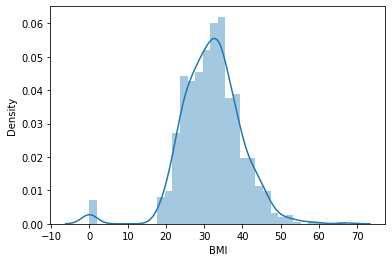

In [ ]:
sns.distplot(data['BMI'])

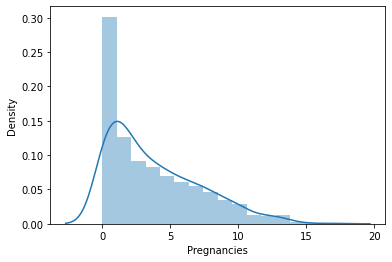

In [ ]:
sns.distplot(data['Pregnancies'])

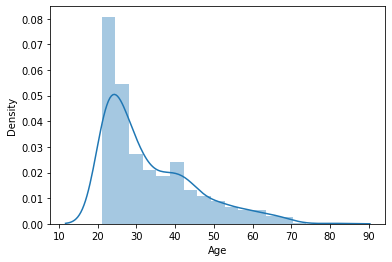

In [ ]:
sns.distplot(data['Age'])

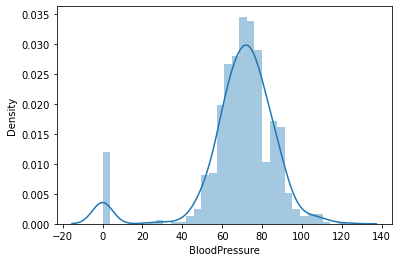

In [ ]:
sns.distplot(data['BloodPressure'])

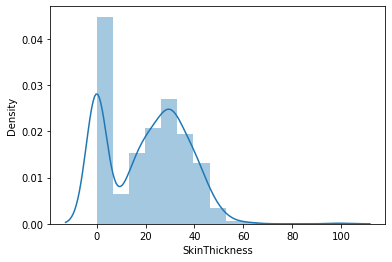

In [ ]:
sns.distplot(data['SkinThickness'])

#Histogram

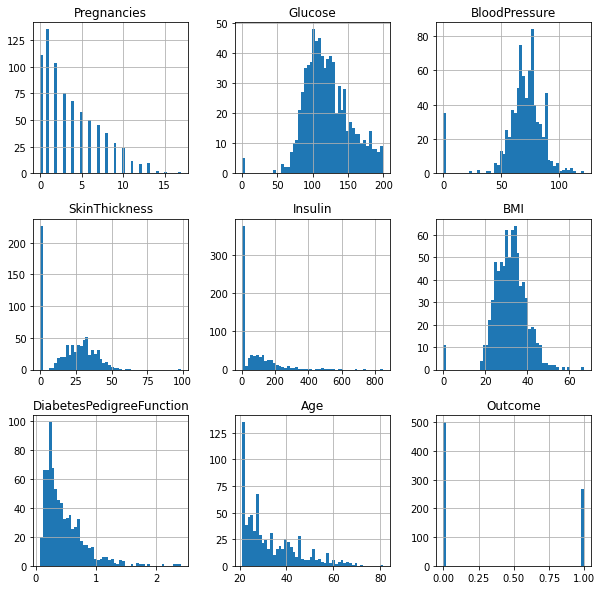

In [ ]:
data.hist(figsize=(10,10),bins=50)
plt.show()

#Heatmap for expressing correlation

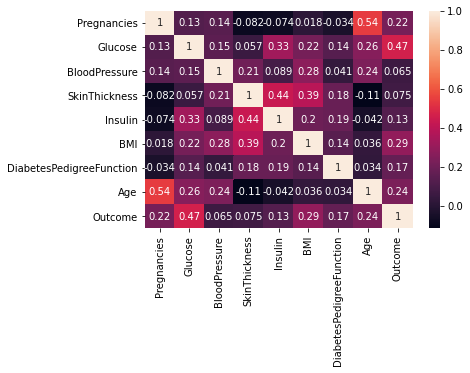

In [ ]:
corr = data.corr()
sns.heatmap(corr,annot=True)

#Box plot for outlier visualization

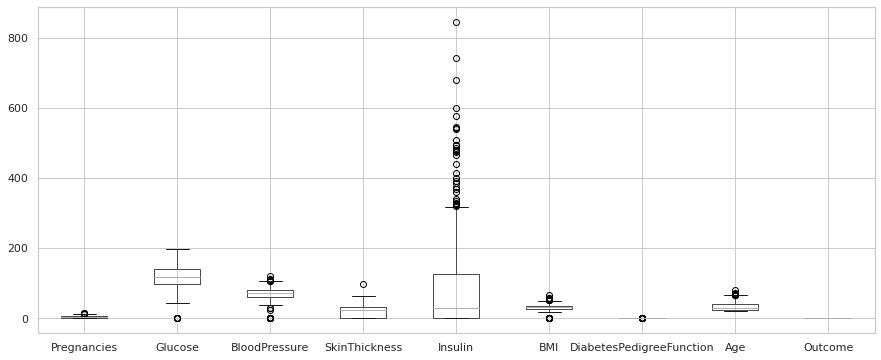

In [ ]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

#Unexpected Outliers

In [ ]:
print("Total : ", data[data.BloodPressure == 0].shape[0])

Total :  35


In [ ]:
print(data[data.BloodPressure == 0].groupby('Outcome')['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


###Blood pressure: By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seem wrong because a living person cannot have a diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.

In [ ]:
print("Total : ", data[data.Glucose == 0].shape[0])

Total :  5


In [ ]:
print(data[data.Glucose == 0].groupby('Outcome')['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


###Plasma glucose levels: Even after fasting glucose levels would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.

In [ ]:
print("Total : ", data[data.SkinThickness == 0].shape[0])

Total :  227


In [ ]:
print(data[data.SkinThickness == 0].groupby('Outcome')['Age'].count())

Outcome
0    139
1     88
Name: Age, dtype: int64


###Skin Fold Thickness: For normal people, skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 227.

In [ ]:
print("Total : ", data[data.BMI == 0].shape[0])

Total :  11


In [ ]:
print(data[data.BMI == 0].groupby('Outcome')['Age'].count())

Outcome
0    9
1    2
Name: Age, dtype: int64


###BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening

In [ ]:
print("Total : ", data[data.Insulin == 0].shape[0])

Total :  374


In [ ]:
print(data[data.Insulin == 0].groupby('Outcome')['Age'].count())

Outcome
0    236
1    138
Name: Age, dtype: int64


####normal fasting insulin levels range between 5 and 15 µU/mL but with more sensitive assays normal fasting insulin should be lower than 12 µU/mL. Obese subjects have increased values, while very high circulating levels are found in patients with severe insulin resistance.

###We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [ ]:
diabetes_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


###Replace zeros in Insulin as its mean values

In [ ]:
 print(data['Insulin'].median())    

79.79


In [ ]:
data['Insulin'] = data['Insulin'].replace(0, 79.79)  

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.79,33.6,0.627,50,1
1,1,85,66,29,79.79,26.6,0.351,31,0
2,8,183,64,0,79.79,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,0,137,40,35,168.00,43.1,2.288,33,1


In [ ]:
diabetes_mod['Insulin'] = data['Insulin']

##Feature Engineering

####Feature engineering is the process of transforming the gathered data into features that better represent the problem that we are trying to solve to the model, to improve its performance and accuracy. Feature engineering creates more input features from the existing features and also combines several features to produce more intuitive features to feed to the model.

In [ ]:
diabetes_mod.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.79,33.6,0.627,50,1
1,1,85,66,29,79.79,26.6,0.351,31,0
2,8,183,64,0,79.79,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,0,137,40,35,168.00,43.1,2.288,33,1


In [ ]:
#lets extract features and targets
X = diabetes_mod.drop(columns=['Outcome'])
Y = diabetes_mod['Outcome']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


##Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

##SVC

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y_train = model.predict(X_train)
pred_y_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score on Training data:",accuracy_score(Y_train,pred_y_train))
print("Accuracy Score on testing data:",accuracy_score(Y_test,pred_y_test))

Accuracy Score on Training data: 0.7633851468048359
Accuracy Score on testing data: 0.7655172413793103


In [ ]:
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)

[[85 12]
 [22 26]]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train,Y_train, cv=7) 

In [ ]:
print(scores)

[0.73493976 0.74698795 0.79518072 0.72289157 0.73493976 0.75609756
 0.79268293]


In [ ]:
scores.mean()

0.7548171781201461

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.68      0.54      0.60        48

    accuracy                           0.77       145
   macro avg       0.74      0.71      0.72       145
weighted avg       0.76      0.77      0.76       145



In [ ]:
new = model.predict([[6,148,72,35,79.79,33.6,0.627,50]])
print(new)

[1]


In [ ]:
new = model.predict([[1,89,66,23,94,28.1,0.167,21]])
print(new)

[0]
